In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
import h5py
import seaborn as sns
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import CCM as cfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [ ]:
#CLASS

In [17]:
# BASELINE 
data_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'BLN' + '_run-01_t' + '*xmap*')
coord_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'BLN' + '_run' + '*1_pre-CCM.npy*')
data_bln_l, coord_bln_l  

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-0

In [128]:
%autoreload
ccm = cfn.ccm_stats(data_bln_l[0], 'ccm')
coord = np.load(coord_bln_l[0], allow_pickle=True).item()['coord']
ccm.shape, coord.shape

((11038, 11038), (11038, 5))

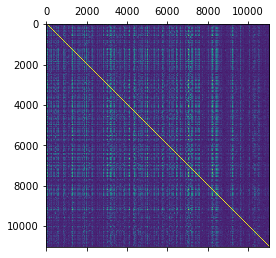

In [129]:
plt.matshow(ccm)

In [174]:
# ccm_region_direction
mode = 'coarse'


#Choose granularity of cell labelling
if mode == 'coarse':
    curr_coord = coord[:,4] #coord labels - coarse 
    lab = np.array(['Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']) #Order labels and choose major brain regions

if mode == 'gran':
    curr_coord = coord[:,3] #coord labels - granular
    
#lab_mat = np.zeros((lab.shape[0], lab.shape[0])) #empty matrix to fill with regional ccm values
#lab_mat.shape

In [ ]:
# WHAT ABOUT EMPTY REGIONS - REGIONS RETAIN LABELS - ONLY DO MAPPING OF SHARED LABELS

In [204]:
data_vec, dlabel_vec, plabel_vec = [],[],[] #vectors for data, driver label and passenger label
for x, l1 in enumerate(lab): #loop through each brain region - rows
    for y,l2 in enumerate(lab): #loop through each brain region - columns
        effect_vec = curr_coord == l1 #binary vector containing the effect of variable of interest (row variable)
        cause_vec = curr_coord == l2 #binary vector containing the cause of variable of interest (column variable)
        dlabel_vec, plabel_vec = np.append(dlabel_vec,l1), np.append(plabel_vec,l2)
        data_vec = np.append(data_vec,np.mean(ccm[effect_vec][:,cause_vec])) #Find mean value
        
        
        #lab_mat[x,y] = np.mean(ccm[effect_vec][:,cause_vec]) #Find mean value

In [205]:
df = {'data': data_vec ,'driver':dlabel_vec, 'passenger': plabel_vec}
df = pd.DataFrame(df)
df

data         driver      passenger
0   0.066739  Telencephalon  Telencephalon
1   0.071125  Telencephalon   Diencephalon
2   0.058725  Telencephalon       Midbrain
3   0.055496  Telencephalon      Hindbrain
4   0.074525   Diencephalon  Telencephalon
5   0.098072   Diencephalon   Diencephalon
6   0.081183   Diencephalon       Midbrain
7   0.072440   Diencephalon      Hindbrain
8   0.068524       Midbrain  Telencephalon
9   0.089926       Midbrain   Diencephalon
10  0.075436       Midbrain       Midbrain
11  0.067598       Midbrain      Hindbrain
12  0.067098      Hindbrain  Telencephalon
13  0.084061      Hindbrain   Diencephalon
14  0.070135      Hindbrain       Midbrain
15  0.068327      Hindbrain      Hindbrain

In [207]:
prac = df.pivot('driver','passenger','data')
prac

passenger      Diencephalon  Hindbrain  Midbrain  Telencephalon
driver                                                         
Diencephalon       0.098072   0.072440  0.081183       0.074525
Hindbrain          0.084061   0.068327  0.070135       0.067098
Midbrain           0.089926   0.067598  0.075436       0.068524
Telencephalon      0.071125   0.055496  0.058725       0.066739

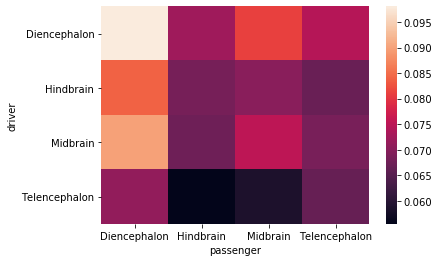

In [208]:
#USE ORDER I WANT! 
ax = sns.heatmap(prac)

# Seizure drivers vs passengers 

In [ ]:
# How does the regional localisation of whole brain drivers vs passengers vary? - are some regions drivers more than passengers
# How does the spatial localisation vary in the healthy vs seizure brain? 

In [31]:
# BASELINE 
data_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'BLN' + '_run-01_t' + '*xmap*')
coord_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'BLN' + '_run' + '*1_pre-CCM.npy*')
data_bln_l, coord_bln_l

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-0

In [32]:
#Calculate difference between drivers vs passenger values
data_cause, coord_cause = cfn.ccm_cellstack(data_bln_l, coord_bln_l, 'c_to_sz')
data_effect, coord_effect = cfn.ccm_cellstack(data_bln_l, coord_bln_l, 'sz_to_c')

diff_vec = data_cause - data_effect #positive values = more seizure driver than passenger


/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/empirical_dynamic_modelling/CCM.py:136: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File(file)


In [63]:
scale = 'coarse'

#Build dict 
cause_df, cause_lab = cfn.ccm_region(data_cause, coord_cause, scale)
effect_df, effect_lab = cfn.ccm_region(data_effect, coord_effect, scale)

#Mean for each fish
cause_mean_df, cause_mean_lab = cfn.ccm_region_mean(cause_df)
effect_mean_df, effect_mean_lab = cfn.ccm_region_mean(effect_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(cause_mean_df, effect_mean_df, 0.05, 'rel')

At least one sample is non-Gaussian - performing non-parametric test
Samples are the same
w = 18.0   p = 1.0
At least one sample is non-Gaussian - performing non-parametric test
Samples are the same
w = 13.0   p = 0.546875
At least one sample is non-Gaussian - performing non-parametric test
Samples are the same
w = 15.0   p = 0.7421875
At least one sample is non-Gaussian - performing non-parametric test
Samples are the same
w = 15.0   p = 0.7421875
At least one sample is non-Gaussian - performing non-parametric test
Samples are the same
w = 8.0   p = 0.1953125
At least one sample is non-Gaussian - performing non-parametric test
Samples are the same
w = 16.0   p = 0.84375


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


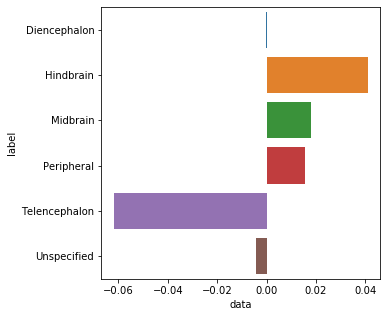

In [74]:
# BASELINE vs BASELINE

shift = 0.35 #coarse = 0.05, gran = 0.35
diff_df = cfn.ccm_diff_dict(effect_mean_df, cause_mean_df)

fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()

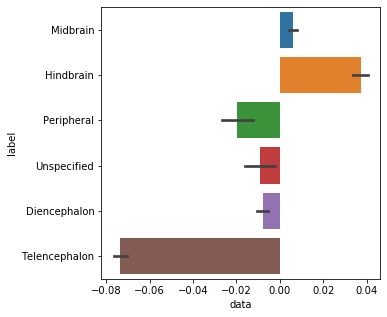

In [67]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(diff_vec, coord_cause, 'coarse')

shift = 0.35 #coarse = 0.05, gran = 0.35

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=df)
plt.show()

In [ ]:
scale = 'gran'

#Build dict 
cause_df, cause_lab = cfn.ccm_region(data_cause, coord_cause, scale)
effect_df, effect_lab = cfn.ccm_region(data_effect, coord_effect, scale)

#Mean for each fish
cause_mean_df, cause_mean_lab = cfn.ccm_region_mean(cause_df)
effect_mean_df, effect_mean_lab = cfn.ccm_region_mean(effect_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(cause_mean_df, effect_mean_df, 0.05, 'rel')

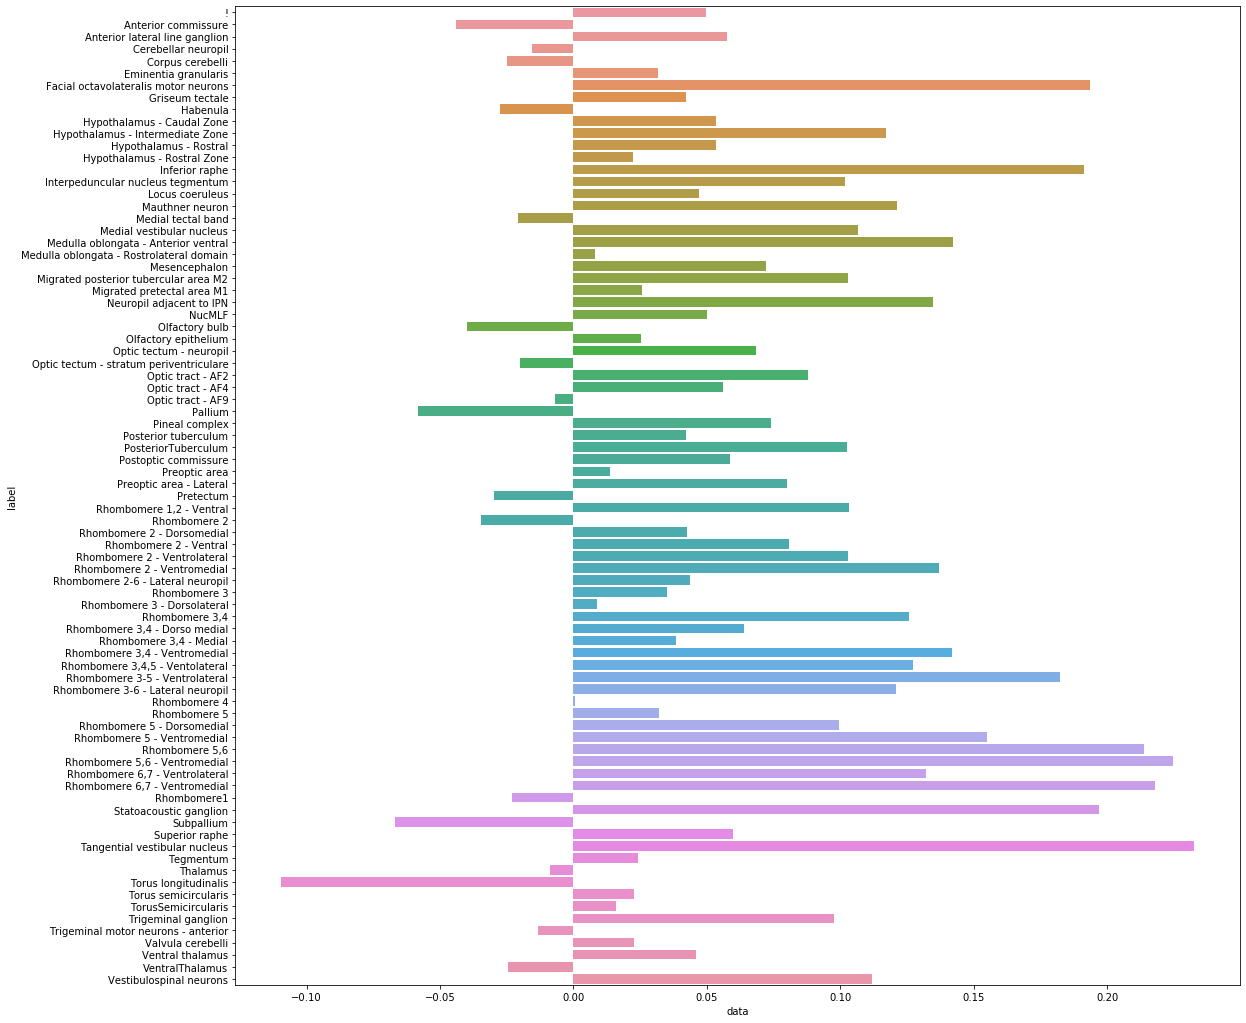

In [76]:
# BASELINE -> BASELIN

shift = 0.05 #coarse = 0.05, gran = 0.5
diff_df = cfn.ccm_diff_dict(effect_mean_df, cause_mean_df)

fig, ax = plt.subplots(figsize = ((18,18)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()


# Whole brain activity drivers

In [ ]:
# Different brain regions/populations contribute to whole brain activity at rest
# How does the contribution of brain regions to whole brain activity change during the seizure?

In [139]:
# BASELINE -> FOCAL SEIZURE
data_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'BLN' + '_run-01_t' + '*xmap*')
coord_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'BLN' + '_run' + '*1_pre-CCM.npy*')
data_p5_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'PTZ05' + '_run-01_t' + '*xmap*')
coord_p5_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'PTZ05' + '_run' + '*1_pre-CCM.npy*')
data_bln_l, coord_bln_l, data_p5_l, coord_p5_l

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-0

In [ ]:
datatype = 'c_to_sz'

#Combine multiple fish brains together
data_bln, coord_bln = cfn.ccm_cellstack(data_bln_l, coord_bln_l, datatype)
data_p5, coord_p5 = cfn.ccm_cellstack(data_p5_l, coord_p5_l, datatype)


In [140]:
datatype = 'c_to_sz'

#Combine multiple fish brains together
data_bln, coord_bln = cfn.ccm_cellstack(data_bln_l, coord_bln_l, datatype)
data_p5, coord_p5 = cfn.ccm_cellstack(data_p5_l, coord_p5_l, datatype)


In [159]:
scale = 'coarse'

#Build dict 
bln_df, bln_lab = cfn.ccm_region(data_bln, coord_bln, scale)
sz_df, sz_lab = cfn.ccm_region(data_p5, coord_p5, scale)

#Mean for each fish
bln_mean_df, bln_mean_lab = cfn.ccm_region_mean(bln_df)
sz_mean_df, sz_mean_lab = cfn.ccm_region_mean(sz_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(bln_mean_df, sz_mean_df, 0.05, 'rel')

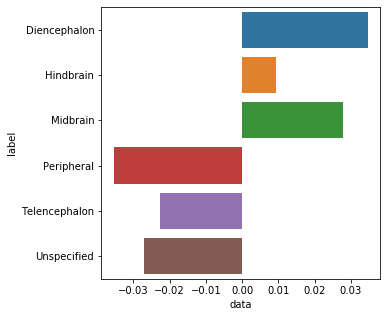

In [163]:
# BASELINE -> FOCAL SEIZURE

shift = 0.35 #coarse = 0.05, gran = 0.35
diff_df = cfn.ccm_diff_dict(bln_mean_df, sz_mean_df)

fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()

In [ ]:
scale = 'gran'

#Build dict 
bln_df, bln_lab = cfn.ccm_region(data_bln, coord_bln, scale)
sz_df, sz_lab = cfn.ccm_region(data_p5, coord_p5, scale)

#Mean for each fish
bln_mean_df, bln_mean_lab = cfn.ccm_region_mean(bln_df)
sz_mean_df, sz_mean_lab = cfn.ccm_region_mean(sz_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(bln_mean_df, sz_mean_df, 0.05, 'rel')

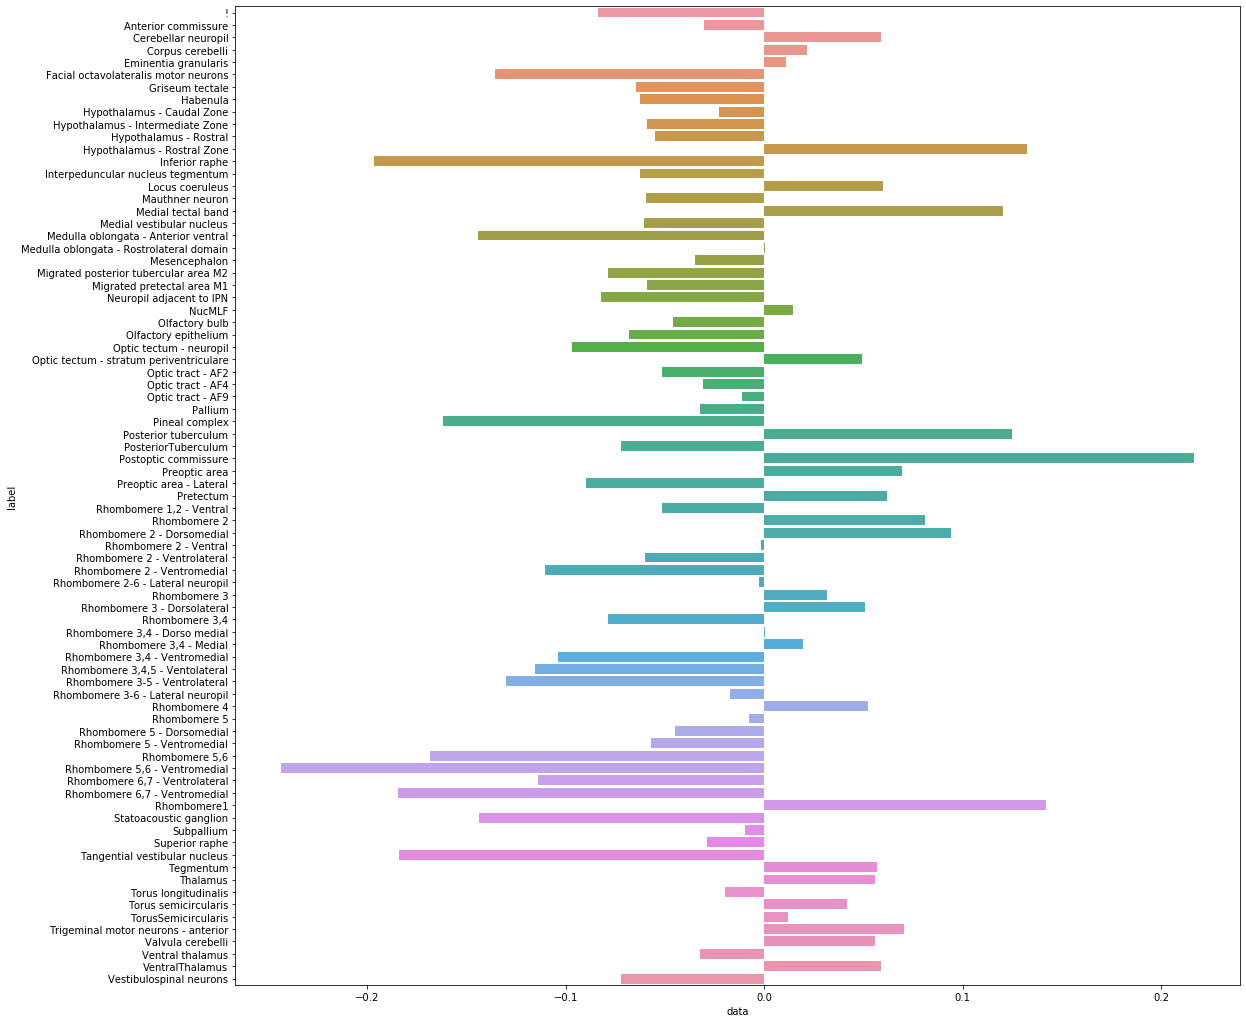

In [192]:
# BASELINE -> FOCAL SEIZURE

shift = 0.05 #coarse = 0.05, gran = 0.5
diff_df = cfn.ccm_diff_dict(bln_mean_df, sz_mean_df)

fig, ax = plt.subplots(figsize = ((18,18)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()


In [150]:
# BASELINE -> GEN SEIZURE
data_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'BLN' + '_run-01_t' + '*xmap*')
coord_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'BLN' + '_run' + '*1_pre-CCM.npy*')
data_p20_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'PTZ20' + '_run-01_t' + '*xmap*')
coord_p20_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'PTZ20' + '_run' + '*1_pre-CCM.npy*')
data_bln_l, coord_bln_l, data_p20_l, coord_p20_l

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-0

In [151]:
datatype = 'c_to_sz'

#Combine multiple fish brains together
#data_bln, coord_bln = cfn.ccm_cellstack(data_bln_l, coord_bln_l, datatype)
data_p20, coord_p20 = cfn.ccm_cellstack(data_p20_l, coord_p20_l, datatype)


/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/empirical_dynamic_modelling/CCM.py:136: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File(file)


In [196]:
scale = 'coarse'

#Build dict 
bln_df, bln_lab = cfn.ccm_region(data_bln, coord_bln, scale)
sz_df, sz_lab = cfn.ccm_region(data_p20, coord_p20, scale)

#Mean for each fish
bln_mean_df, bln_mean_lab = cfn.ccm_region_mean(bln_df)
sz_mean_df, sz_mean_lab = cfn.ccm_region_mean(sz_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(bln_mean_df, sz_mean_df, 0.05, 'ind')

At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 2.0   p = 0.005207497329531634
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 8.0   p = 0.046146169517036595
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 6.0   p = 0.024066198109790972
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 8.0   p = 0.046146169517036595
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 1.0   p = 0.0033832500175298174
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 1.0   p = 0.0033832500175298174


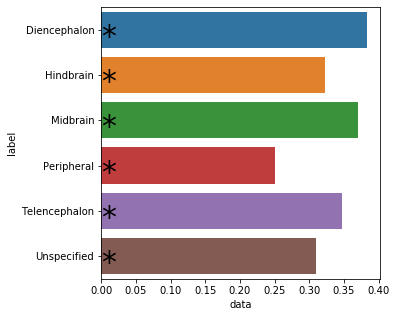

In [211]:
# BASELINE -> GEN SEIZURE

shift = 0.35 #coarse = 0.05, gran = 0.35
diff_df = cfn.ccm_diff_dict(bln_mean_df, sz_mean_df)

fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()

In [ ]:
scale = 'gran'

#Build dict 
bln_df, bln_lab = cfn.ccm_region(data_bln, coord_bln, scale)
sz_df, sz_lab = cfn.ccm_region(data_p20, coord_p20, scale)

#Mean for each fish
bln_mean_df, bln_mean_lab = cfn.ccm_region_mean(bln_df)
sz_mean_df, sz_mean_lab = cfn.ccm_region_mean(sz_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(bln_mean_df, sz_mean_df, 0.05, 'ind')

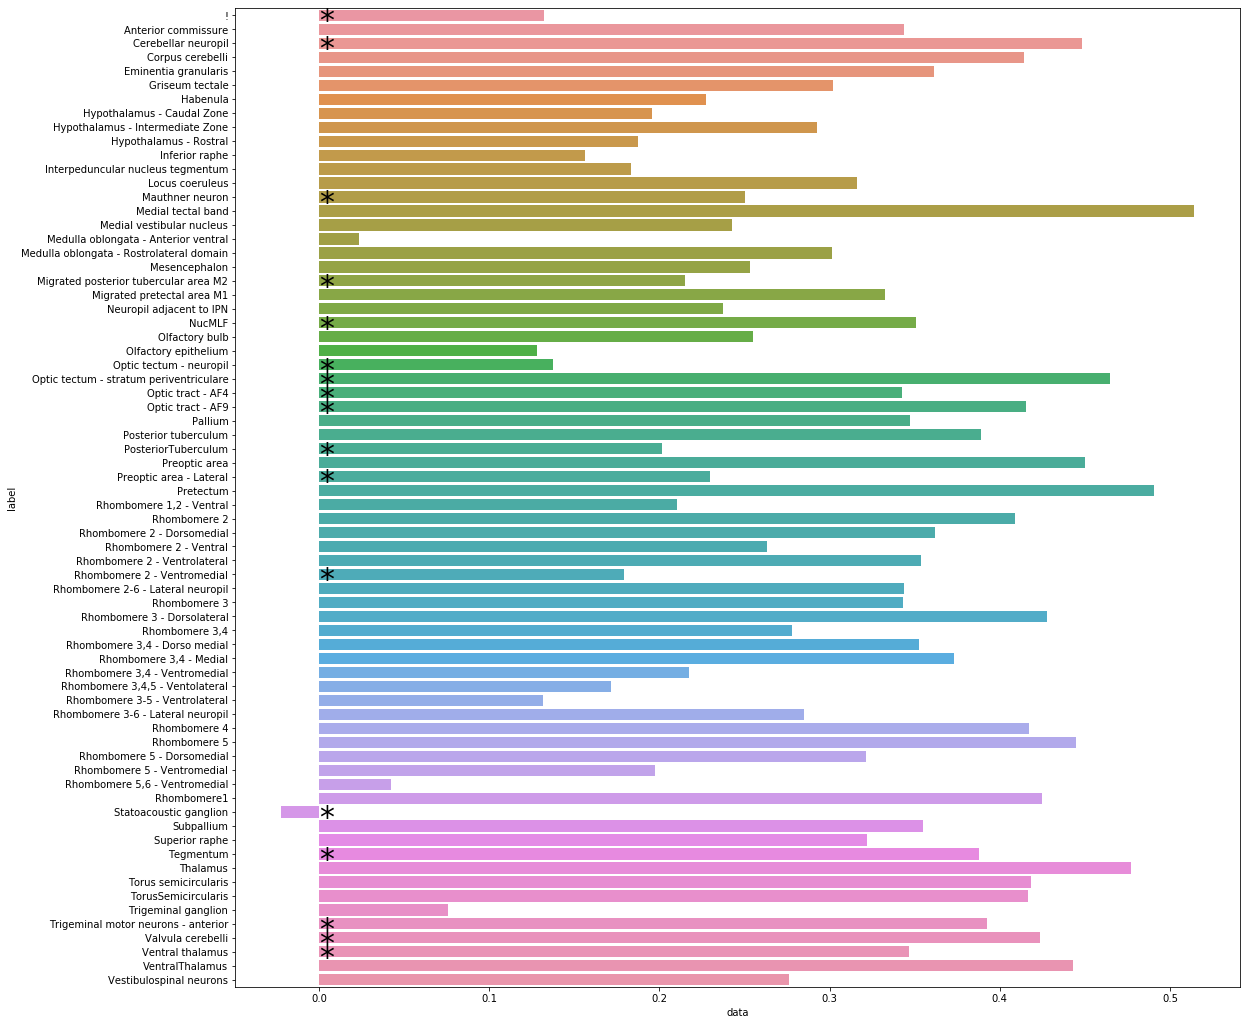

In [215]:
# BASELINE -> GEN SEIZURE

shift = 0.05 #coarse = 0.05, gran = 0.3
diff_df = cfn.ccm_diff_dict(bln_mean_df, sz_mean_df)

fig, ax = plt.subplots(figsize = ((18,18)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()


In [ ]:
# CELLS DRIVING BASELINE ACTIVITY
cond_list = 'BLN', 'PTZ05', 'PTZ20'
cond = cond_list[0]
print(cond)

data_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + cond + '_run-01_t' + '*xmap*')
coord_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  cond + '_run' + '*1_pre-CCM.npy*')
data_l, coord_l

In [92]:
#BLN
data, coord = cfn.ccm_cellstack(data_l, coord_l, 'c_to_sz')
data.shape, coord.shape

/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/empirical_dynamic_modelling/CCM.py:136: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File(file)


((78499,), (78499, 6))

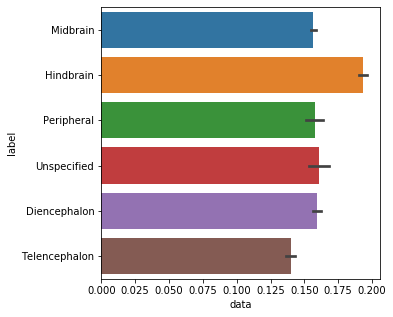

In [98]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(data, coord, 'coarse')

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=df)
plt.show()

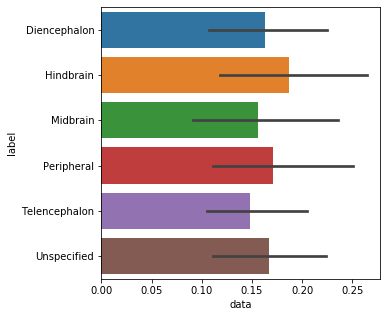

In [96]:
#Mean for each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=mean_df)
plt.show()

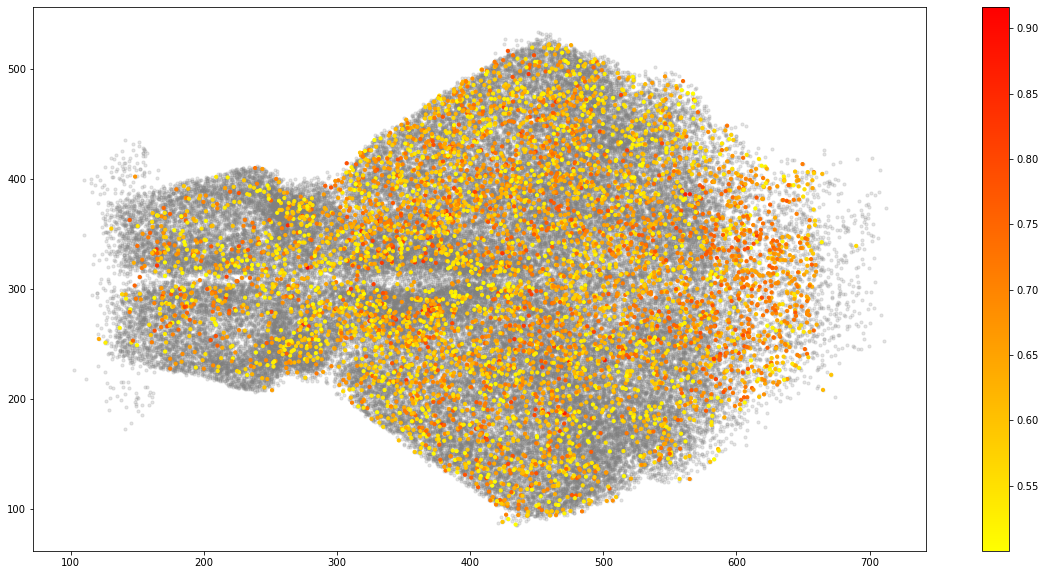

In [103]:
#Visualise fish
cfn.ccm_cellplot(df, 0.5, '', 0.05)

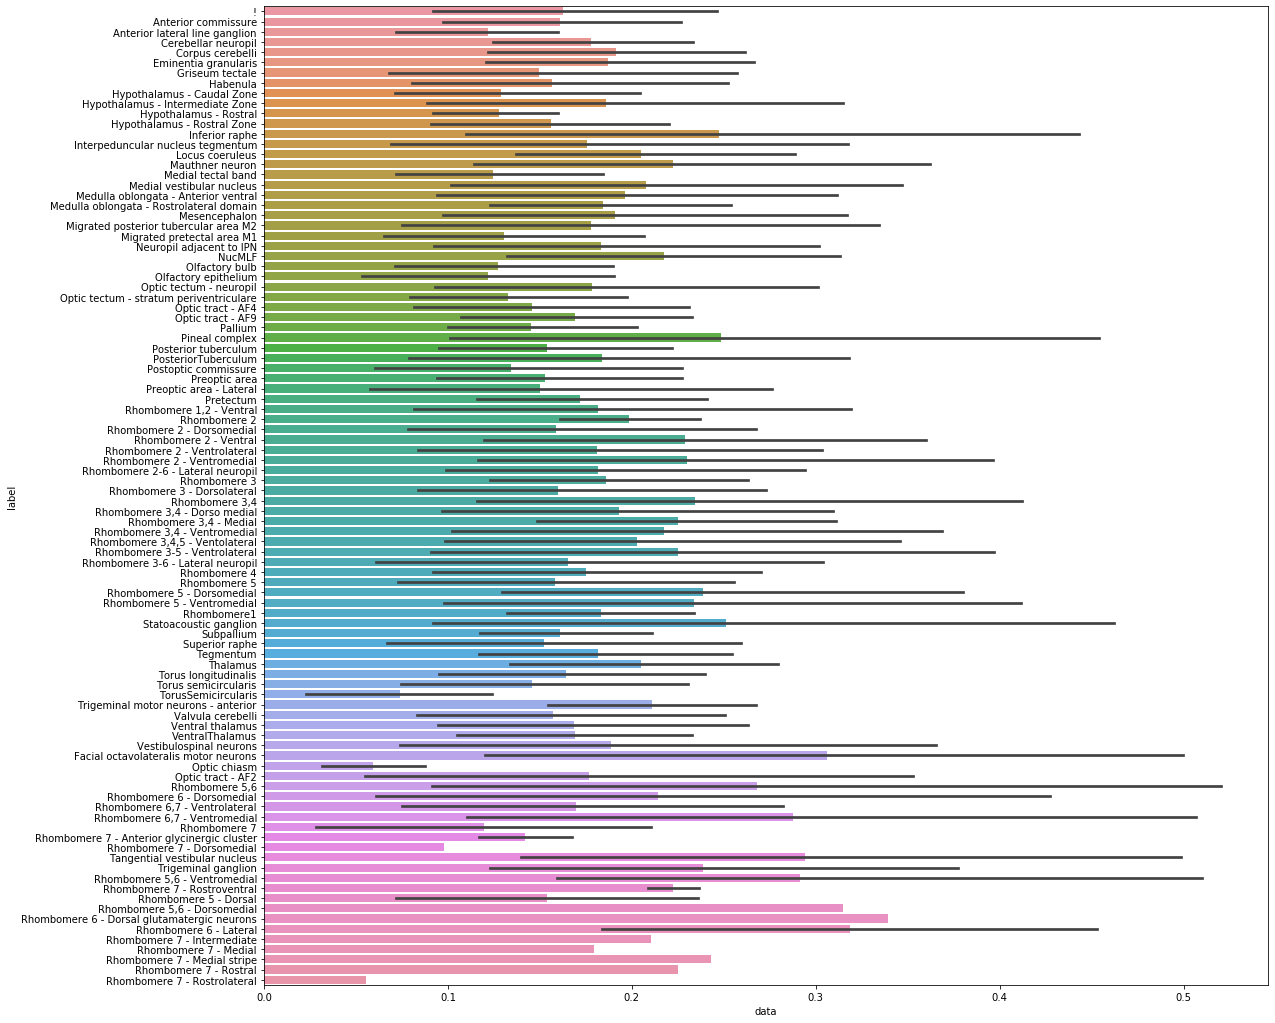

In [97]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(data, coord, 'gran')

#Mean for each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((18,18)))
ax = sns.barplot(y="label", x="data", data=mean_df)
plt.show()

In [74]:
# CELLS DRIVING FOCAL SEIZURES
cond_list = 'BLN', 'PTZ05', 'PTZ20'
cond = cond_list[1]
print(cond)

data_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + cond + '_run-01_t' + '*xmap*')
coord_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  cond + '_run' + '*1_pre-CCM.npy*')
data_l, coord_l

PTZ05


(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2p

In [75]:
#PTZ05
data, coord = cfn.ccm_cellstack(data_l, coord_l, 'c_to_sz')
data.shape, coord.shape

/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/empirical_dynamic_modelling/CCM.py:136: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File(file)


((89564,), (89564, 6))

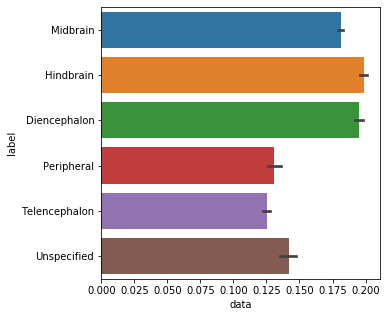

In [82]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(data, coord, 'coarse')

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=df)
plt.show()

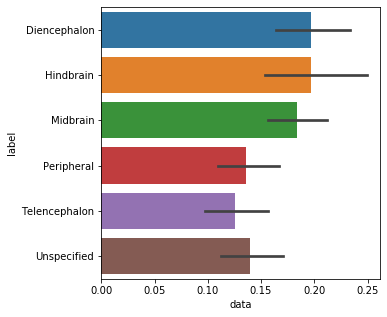

In [77]:
#Mean for each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=mean_df)
plt.show()

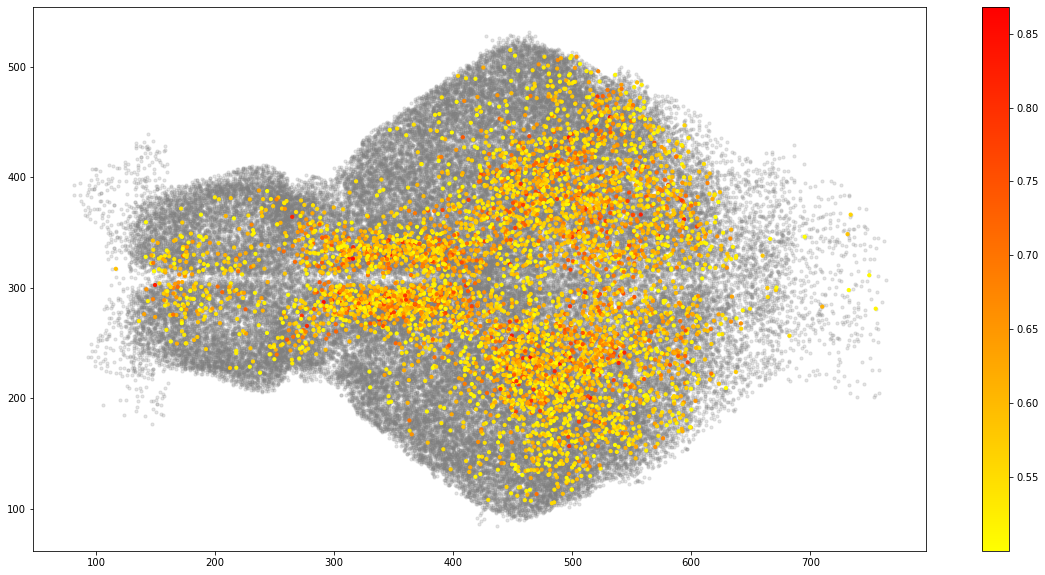

In [85]:
#Visualise fish
cfn.ccm_cellplot(df, 0.5, '')

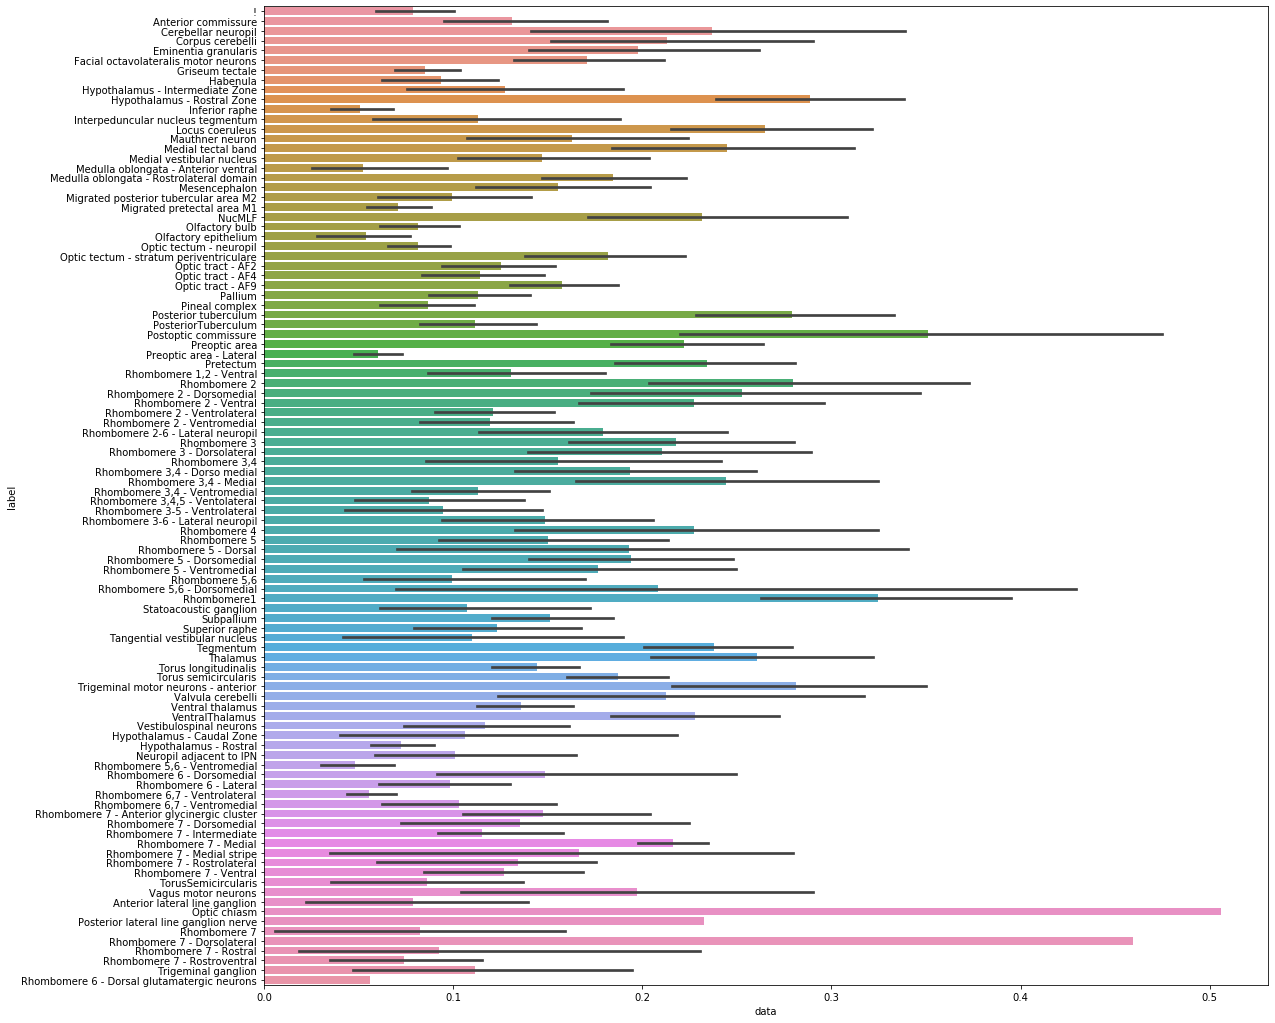

In [86]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(data, coord, 'gran')

#Mean for each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((18,18)))
ax = sns.barplot(y="label", x="data", data=mean_df)
plt.show()

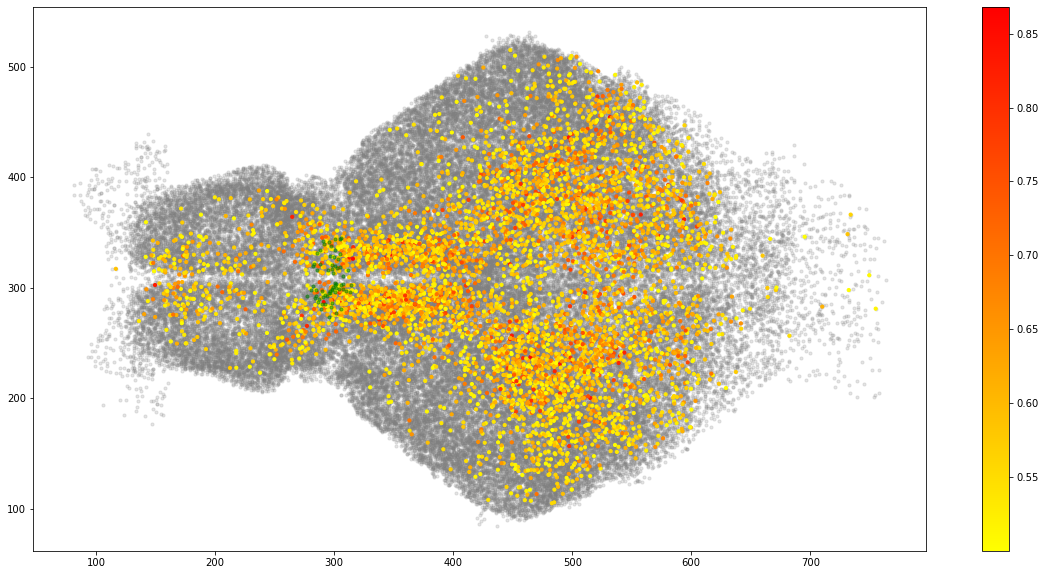

In [90]:
%autoreload
#Visualise fish
cfn.ccm_cellplot(df, 0.5, 'Postoptic commissure', 0.5)

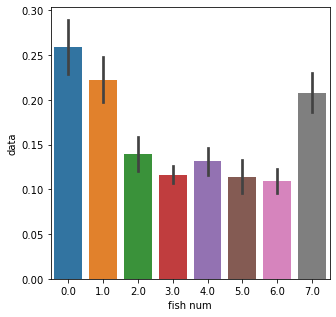

In [81]:
#Mean values across each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(x="fish num", y="data", data=mean_df)
plt.show()

In [2]:
# CELLS DRIVING GENERALISED SEIZURES
cond_list = 'BLN', 'PTZ05', 'PTZ20'
cond = cond_list[2]
print(cond)

data_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + cond + '_run-01_t' + '*xmap*')
coord_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  cond + '_run' + '*1_pre-CCM.npy*')
data_l, coord_l

PTZ20


(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy'])

In [3]:
#PTZ20
data, coord = cfn.ccm_cellstack(data_l, coord_l, 'c_to_sz')
data.shape, coord.shape

/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/empirical_dynamic_modelling/CCM.py:136: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File(file)


((44389,), (44389, 6))

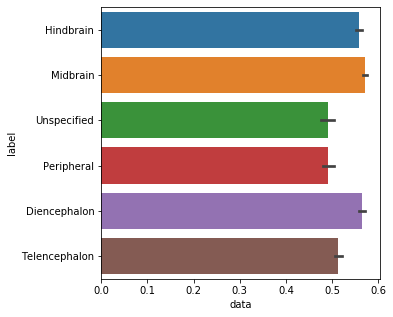

In [72]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(data, coord, 'coarse')

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=df)
plt.show()

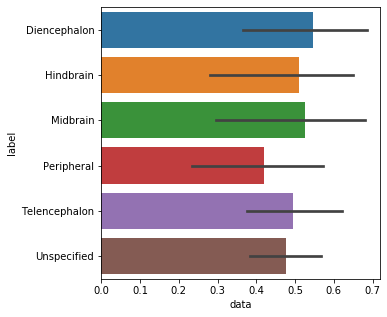

In [45]:
#Mean for each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=mean_df)
plt.show()

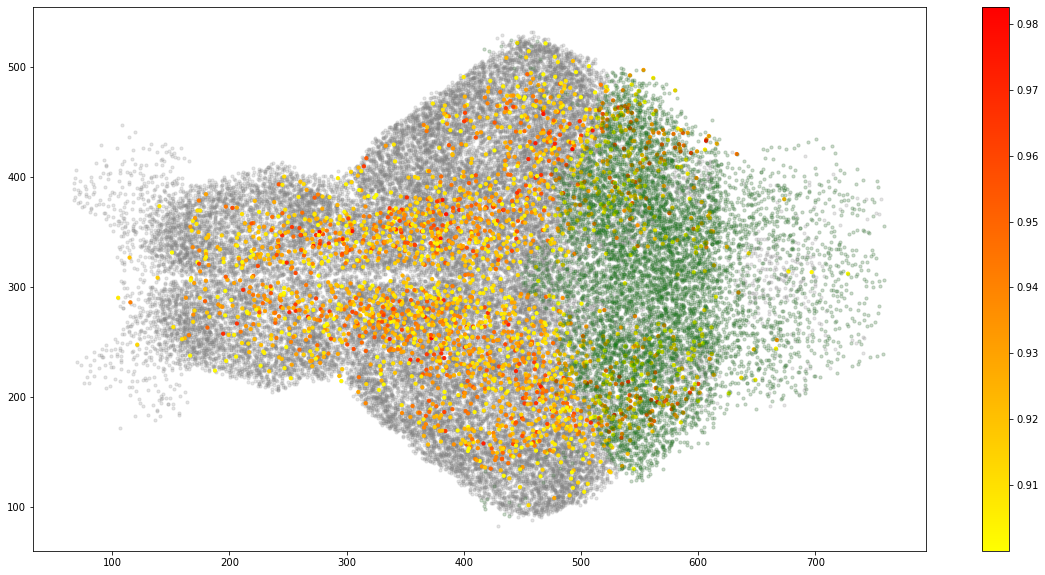

In [73]:
#Visualise fish
cfn.ccm_cellplot(df, 0.9, 'Hindbrain')

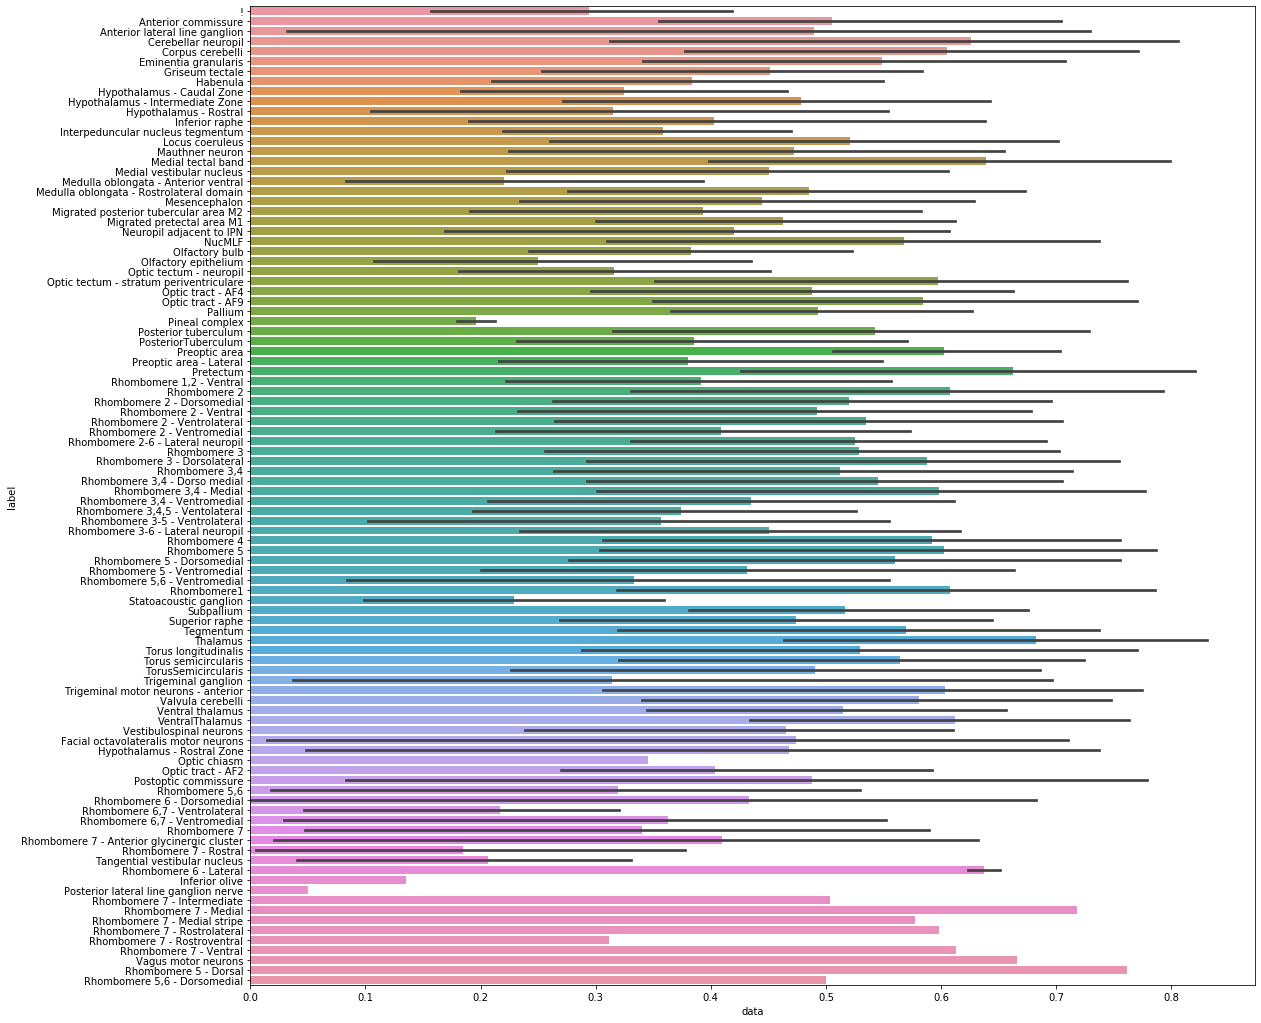

In [66]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(data, coord, 'gran')

#Mean for each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((18,18)))
ax = sns.barplot(y="label", x="data", data=mean_df)
plt.show()

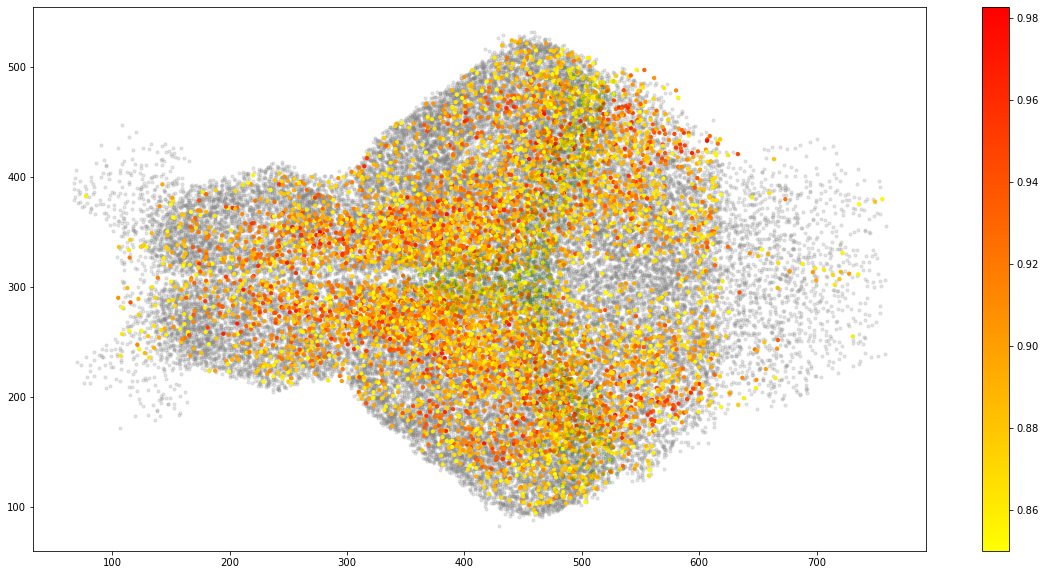

In [70]:
#Visualise fish
cfn.ccm_cellplot(df, 0.85, 'Medial tectal band')

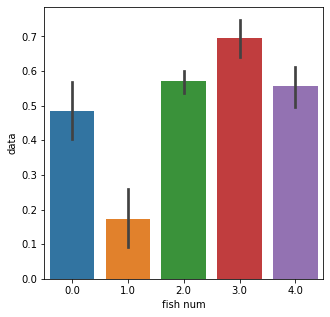

In [37]:
#Mean values across each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(x="fish num", y="data", data=mean_df)
plt.show()

# Whole brain activity passengers


In [171]:
# Different brain regions/populations are driven by whole brain activity at rest
# How does the effect of whole brain activity on different brain regions change during the seizure?

In [9]:
# BASELINE -> FOCAL SEIZURE
data_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'BLN' + '_run-01_t' + '*xmap*')
coord_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'BLN' + '_run' + '*1_pre-CCM.npy*')
data_p5_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'PTZ05' + '_run-01_t' + '*xmap*')
coord_p5_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'PTZ05' + '_run' + '*1_pre-CCM.npy*')
data_bln_l, coord_bln_l, data_p5_l, coord_p5_l

(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-0

In [10]:
datatype = 'sz_to_c'

#Combine multiple fish brains together
data_bln, coord_bln = cfn.ccm_cellstack(data_bln_l, coord_bln_l, datatype)
data_p5, coord_p5 = cfn.ccm_cellstack(data_p5_l, coord_p5_l, datatype)


/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/empirical_dynamic_modelling/CCM.py:136: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File(file)


In [11]:
scale = 'coarse'

#Build dict 
bln_df, bln_lab = cfn.ccm_region(data_bln, coord_bln, scale)
sz_df, sz_lab = cfn.ccm_region(data_p5, coord_p5, scale)

#Mean for each fish
bln_mean_df, bln_mean_lab = cfn.ccm_region_mean(bln_df)
sz_mean_df, sz_mean_lab = cfn.ccm_region_mean(sz_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(bln_mean_df, sz_mean_df, 0.05, 'rel')

At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.0078125
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.0078125
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.0078125
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.0078125
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.0078125
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.0078125


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


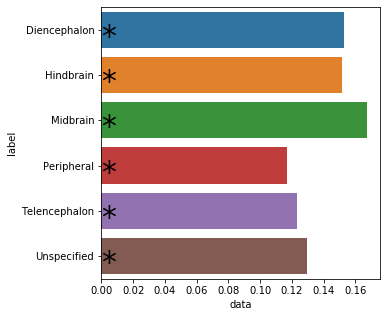

In [12]:

# BASELINE -> FOCAL SEIZURE

shift = 0.35 #coarse = 0.05, gran = 0.35
diff_df = cfn.ccm_diff_dict(bln_mean_df, sz_mean_df)

fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()

In [ ]:
scale = 'gran'

#Build dict 
bln_df, bln_lab = cfn.ccm_region(data_bln, coord_bln, scale)
sz_df, sz_lab = cfn.ccm_region(data_p5, coord_p5, scale)

#Mean for each fish
bln_mean_df, bln_mean_lab = cfn.ccm_region_mean(bln_df)
sz_mean_df, sz_mean_lab = cfn.ccm_region_mean(sz_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(bln_mean_df, sz_mean_df, 0.05, 'rel')


In [17]:
sig_v

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

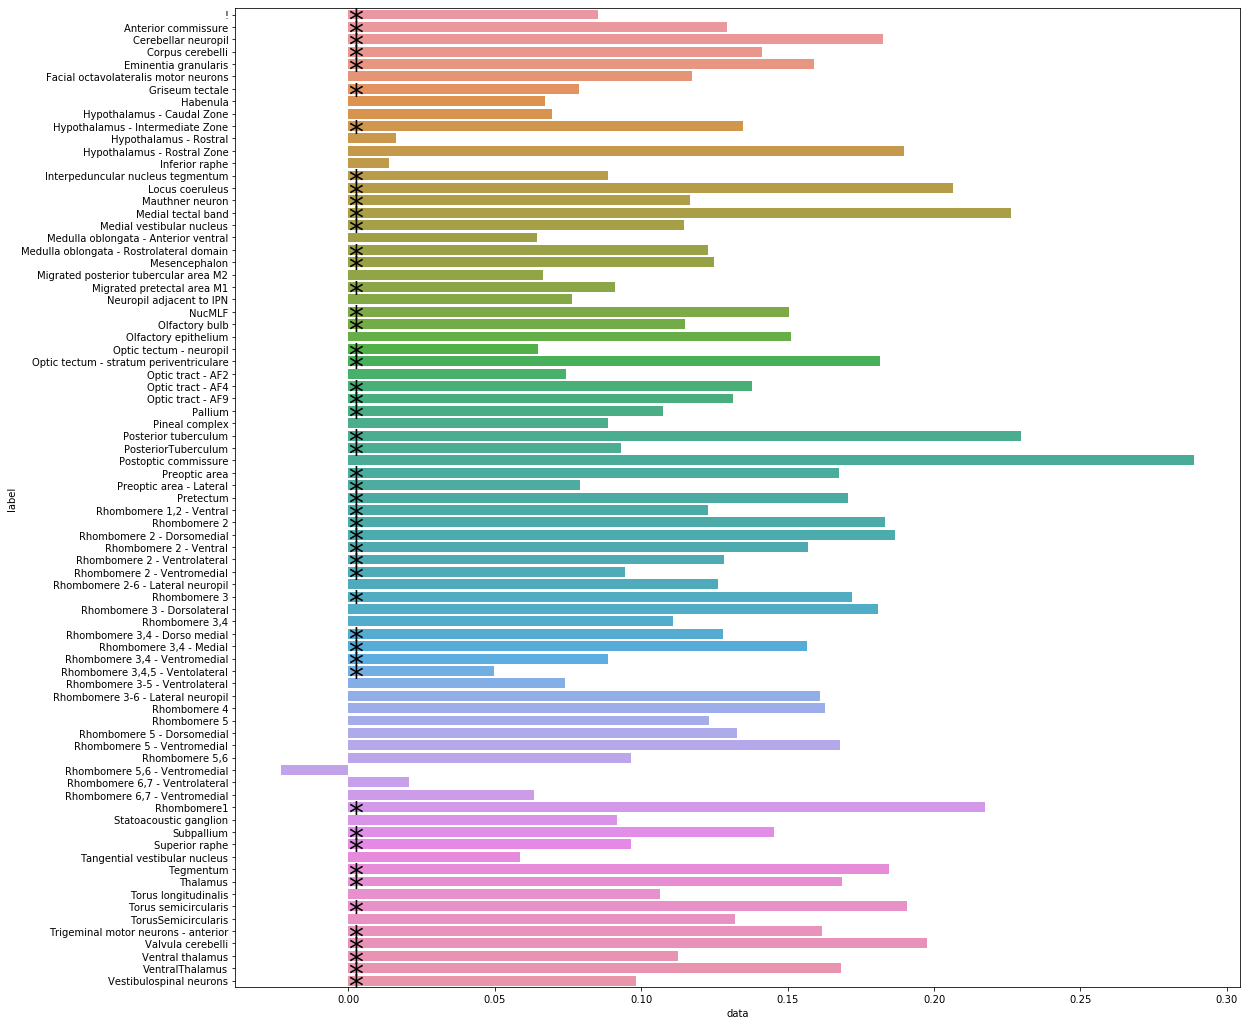

In [21]:
# BASELINE -> FOCAL SEIZURE

shift = 1.2 #coarse = 0.05, gran = 0.5
diff_df = cfn.ccm_diff_dict(bln_mean_df, sz_mean_df)

fig, ax = plt.subplots(figsize = ((18,18)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()


In [22]:
# BASELINE -> GEN SEIZURE
data_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'BLN' + '_run-01_t' + '*xmap*')
coord_bln_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'BLN' + '_run' + '*1_pre-CCM.npy*')
data_p20_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + 'PTZ20' + '_run-01_t' + '*xmap*')
coord_p20_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  'PTZ20' + '_run' + '*1_pre-CCM.npy*')
data_bln_l, coord_bln_l, data_p20_l, coord_p20_l


(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-0

In [24]:
datatype = 'sz_to_c'

#Combine multiple fish brains together
#data_bln, coord_bln = cfn.ccm_cellstack(data_bln_l, coord_bln_l, datatype)
data_p20, coord_p20 = cfn.ccm_cellstack(data_p20_l, coord_p20_l, datatype)

In [25]:
scale = 'coarse'

#Build dict 
bln_df, bln_lab = cfn.ccm_region(data_bln, coord_bln, scale)
sz_df, sz_lab = cfn.ccm_region(data_p20, coord_p20, scale)

#Mean for each fish
bln_mean_df, bln_mean_lab = cfn.ccm_region_mean(bln_df)
sz_mean_df, sz_mean_lab = cfn.ccm_region_mean(sz_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(bln_mean_df, sz_mean_df, 0.05, 'ind')



At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 1.0   p = 0.0033832500175298174
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 8.0   p = 0.046146169517036595
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 1.0   p = 0.0033832500175298174
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 4.0   p = 0.011635146004975378
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 0.0   p = 0.0021551792497675215
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
U = 0.0   p = 0.0021551792497675215


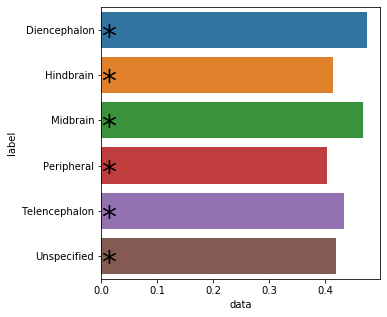

In [26]:
# BASELINE -> GEN SEIZURE

shift = 0.35 #coarse = 0.05, gran = 0.35
diff_df = cfn.ccm_diff_dict(bln_mean_df, sz_mean_df)

fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()

In [ ]:
scale = 'gran'

#Build dict 
bln_df, bln_lab = cfn.ccm_region(data_bln, coord_bln, scale)
sz_df, sz_lab = cfn.ccm_region(data_p20, coord_p20, scale)

#Mean for each fish
bln_mean_df, bln_mean_lab = cfn.ccm_region_mean(bln_df)
sz_mean_df, sz_mean_lab = cfn.ccm_region_mean(sz_df)

# FDR comparison
sig_v, adj_p, comp_lab = cfn.ccm_fdr(bln_mean_df, sz_mean_df, 0.05, 'ind')

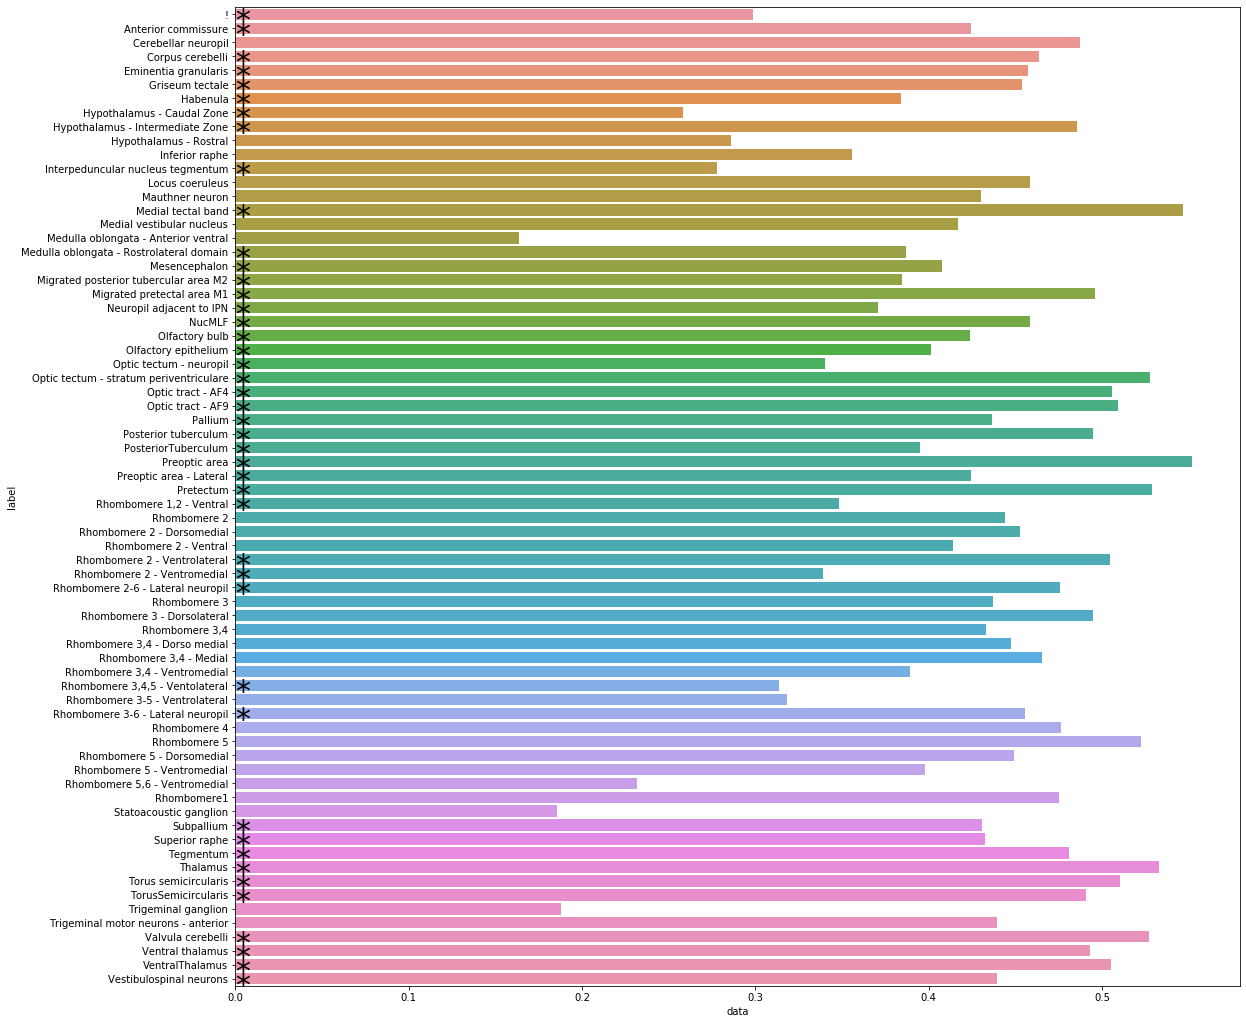

In [30]:

# BASELINE -> GEN SEIZURE

shift = 1.1 #coarse = 0.05, gran = 0.3
diff_df = cfn.ccm_diff_dict(bln_mean_df, sz_mean_df)

fig, ax = plt.subplots(figsize = ((18,18)))
ax = sns.barplot(y="label", x="data", data=diff_df)

for s,name in enumerate(np.array(diff_df['label'])):
    if name in comp_lab[sig_v]:
        plt.text(x=0, y=s+shift, s='*', size = 30) 
plt.show()


In [223]:
# CELLS DRIVEN BY BASELINE ACTIVITY
cond_list = 'BLN', 'PTZ05', 'PTZ20'
cond = cond_list[0]
print(cond)

data_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + cond + '_run-01_t' + '*xmap*')
coord_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  cond + '_run' + '*1_pre-CCM.npy*')
data_l, coord_l

BLN


(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_BLN_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_BLN_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_BLN_run-0

In [224]:
#BLN
data, coord = cfn.ccm_cellstack(data_l, coord_l, 'sz_to_c')
data.shape, coord.shape

/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/empirical_dynamic_modelling/CCM.py:136: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File(file)


((78499,), (78499, 6))

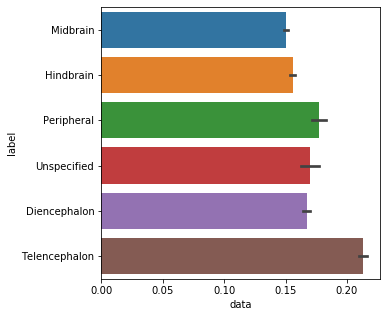

In [225]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(data, coord, 'coarse')

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=df)
plt.show()

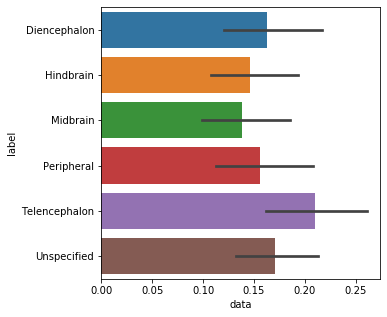

In [226]:
#Mean for each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=mean_df)
plt.show()

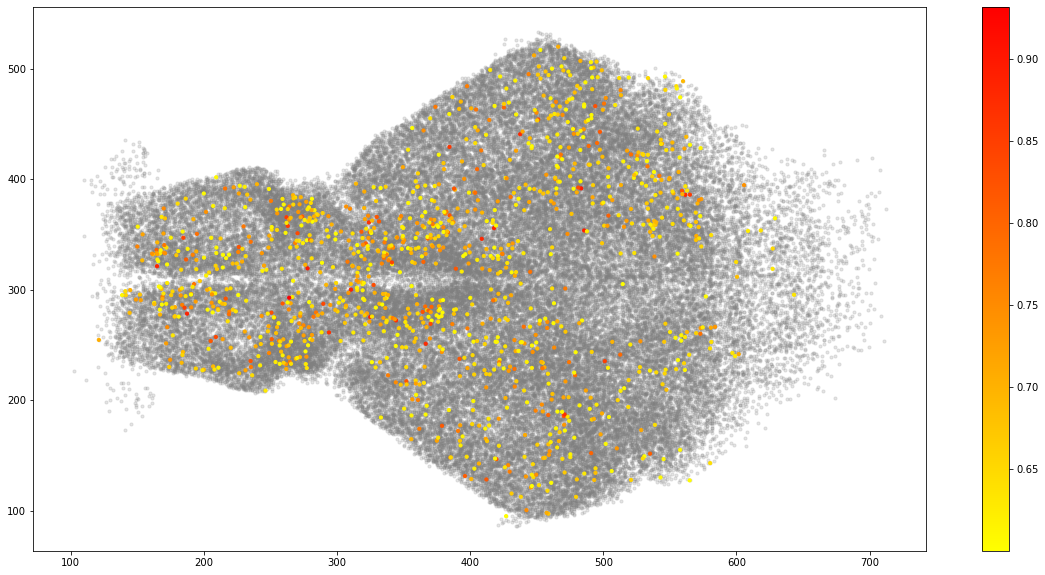

In [230]:
#Visualise fish
cfn.ccm_cellplot(df, 0.6, '', 0.5)

In [231]:
# CELLS DRIVEN BY FOCAL SEIZURE
cond_list = 'BLN', 'PTZ05', 'PTZ20'
cond = cond_list[1]
print(cond)

data_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + cond + '_run-01_t' + '*xmap*')
coord_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  cond + '_run' + '*1_pre-CCM.npy*')
data_l, coord_l

PTZ05


(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-15_2photon_sess-01-6dpf_PTZ05_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ05_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2p

In [232]:
#FOCAL SEIZURE
data, coord = cfn.ccm_cellstack(data_l, coord_l, 'sz_to_c')
data.shape, coord.shape

/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/empirical_dynamic_modelling/CCM.py:136: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File(file)


((89564,), (89564, 6))

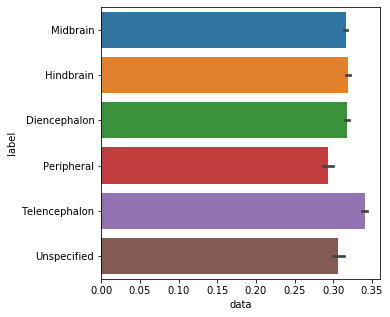

In [233]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(data, coord, 'coarse')

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=df)
plt.show()

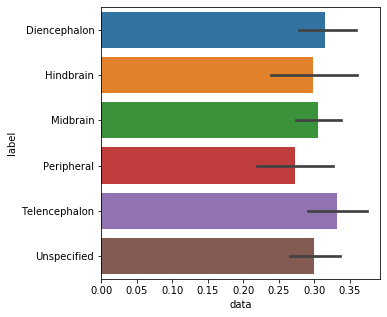

In [234]:
#Mean for each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=mean_df)
plt.show()

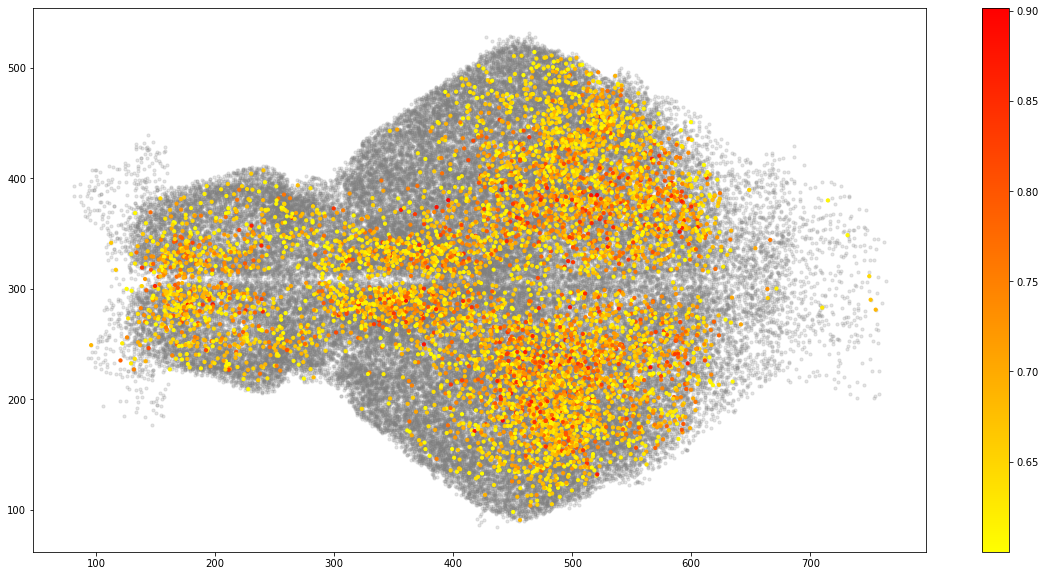

In [235]:
#Visualise fish
cfn.ccm_cellplot(df, 0.6, '', 0.5)

In [3]:
# CELLS DRIVEN BY GEN SEIZURE
cond_list = 'BLN', 'PTZ05', 'PTZ20'
cond = cond_list[2]
print(cond)

data_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' + cond + '_run-01_t' + '*xmap*')
coord_l = adfn.return_files(Fdata, 'PTZ-WILDTYPE-CCM', '*' +  cond + '_run' + '*1_pre-CCM.npy*')
data_l, coord_l

PTZ20


(['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_PTZ20_run-01_trace_CCMxmap.h5'],
 ['PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-13_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy',
  'PTZ-WILDTYPE-14_2photon_sess-01-6dpf_PTZ20_run-01_pre-CCM.npy'])

In [4]:
#GEN
data, coord = cfn.ccm_cellstack(data_l, coord_l, 'sz_to_c')
data.shape, coord.shape

/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/empirical_dynamic_modelling/CCM.py:136: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  data = h5py.File(file)


((44389,), (44389, 6))

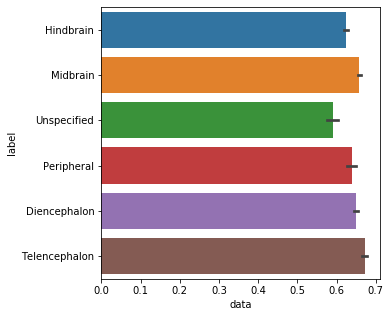

In [5]:
#Neurons pooled across fish
df, lab = cfn.ccm_region(data, coord, 'coarse')

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=df)
plt.show()

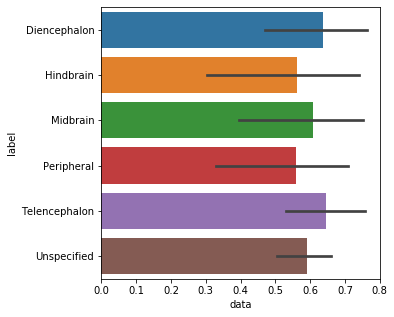

In [6]:
#Mean for each fish
mean_df, lab = cfn.ccm_region_mean(df)

#Visualise single dataset bar plot
fig, ax = plt.subplots(figsize = ((5,5)))
ax = sns.barplot(y="label", x="data", data=mean_df)
plt.show()

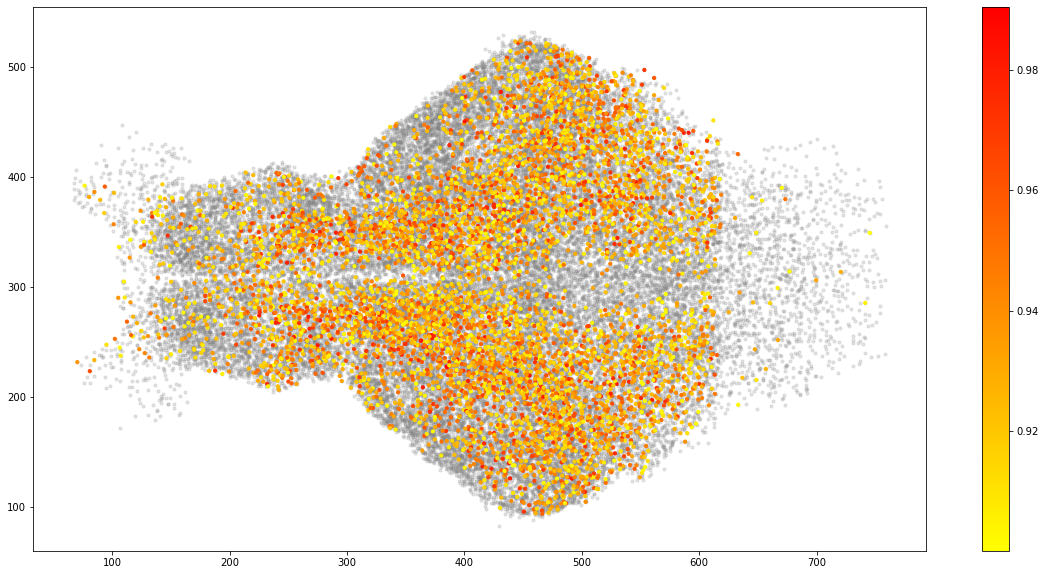

In [8]:
#Visualise fish
cfn.ccm_cellplot(df, 0.9, '', 0.5)